<a href="https://colab.research.google.com/github/dsanmartin/ELE050-B/blob/main/02_linear_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

# Datos
Usaremos los mismos $x$ para ambos problemas. Además, construimos la matriz $X$ con
\begin{equation}
  X =
  \begin{pmatrix}
  1 & \mathbf{x}_{1} \\
  1 & \mathbf{x}_{2} \\
  \vdots & \vdots \\
  1 & \mathbf{x}_{N}
  \end{pmatrix}
\end{equation}

In [2]:
N = 128
x = np.linspace(-10, 10, N)
X = np.vstack((np.ones(N), x)).T # Crear la matriz con la primera columna de 1's

# Regresión Lineal

## Ejemplo de regresión lineal simple

In [3]:
w_reg = np.array([5, 1]) # Pesos para generar datos sintéticos
f = lambda x: w_reg[0] + w_reg[1] * x # Regresión lineal simple

In [4]:
y_reg = f(x) + np.random.normal(0, 2, N)

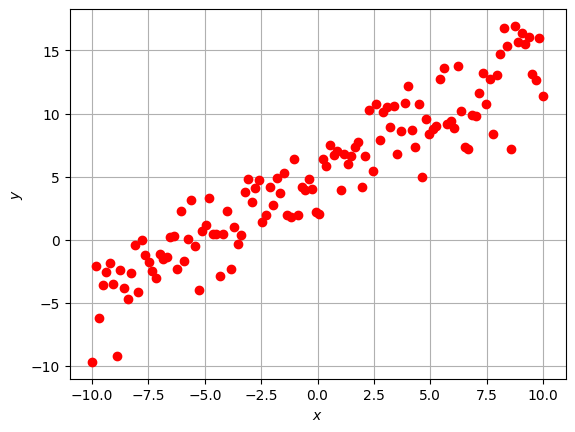

In [5]:
plt.plot(x, y_reg, 'ro')
plt.grid(True)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

## Ecuaciones Normales

Método para obtener los parámetros $\mathbf{w}$:
\begin{equation}
  X^\top X \mathbf{w}=X^\top \mathbf{y}
\end{equation}

In [6]:
w_reg_ = np.linalg.solve(X.T @ X, X.T @ y_reg)

In [7]:
w_reg_

array([5.03267523, 0.960414  ])

## Resolver usando Scikit-Learn

In [8]:
lr = LinearRegression(fit_intercept=False) # El ajuste de intercepto se puede remover si agregamos la columna de 1's
lr = lr.fit(X, y_reg)

In [9]:
print("Parámetros:", lr.coef_)

Parámetros: [5.03267523 0.960414  ]


In [10]:
y_hat = lr.predict(X)

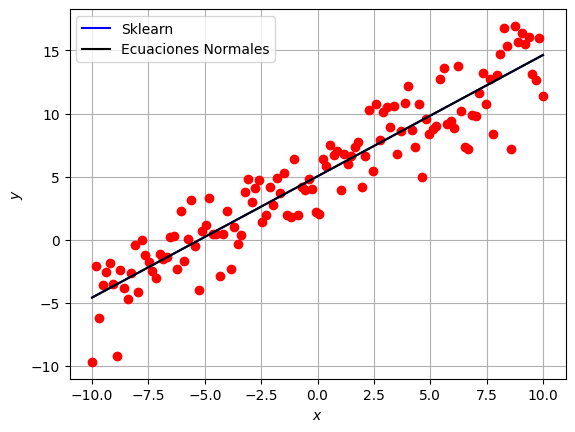

In [11]:
plt.plot(x, y_reg, 'ro')
plt.plot(x, y_hat, 'b-', label="Sklearn")
plt.plot(x, X @ w_reg_, 'k-', label="Ecuaciones Normales")
plt.grid(True)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.legend()
plt.show()

In [12]:
MSE = 1 / N * np.sum((y_reg-y_hat)**2)

In [13]:
print("MSE = %.4f, RMSE = %.4f" % (MSE, MSE**0.5))

MSE = 4.3948, RMSE = 2.0964


# Regresión Logística

In [14]:
sigmoide = lambda x: 1 / (1 + np.exp(-x))

In [15]:
y_log = sigmoide(x) + 0.1 * np.random.normal(0, 1, N)
y_log[y_log >= 0.5] = 1
y_log[y_log < 0.5] = 0

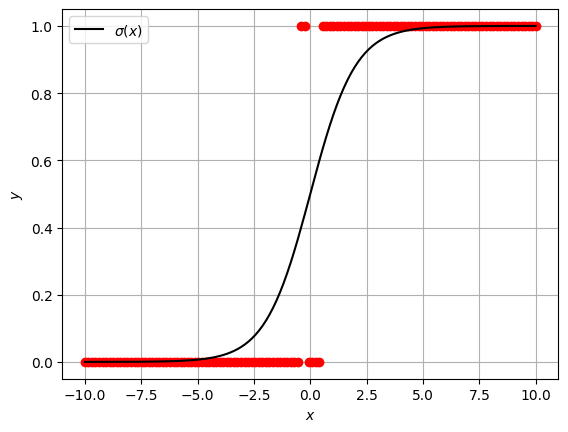

In [16]:
plt.plot(x, y_log, 'ro')
plt.plot(x, sigmoide(x), 'k-', label=r"$\sigma(x)$")
plt.grid(True)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.legend()
plt.show()

In [17]:
idx = np.random.permutation(N) # Permutar los datos

In [18]:
X_log, y_log = X[idx], y_log[idx]

In [19]:
# fit_intercept=False porque agregamos las 1's, penalty=None para que no incluya regularización
lrc = LogisticRegression(fit_intercept=False, penalty=None)
lrc = lrc.fit(X_log, y_log)

In [20]:
y_hat_log = lrc.predict(X_log)

In [21]:
print("Predicción/Total = %.2f" % (np.sum(y_hat_log == y_log)/N))

Predicción/Total = 0.97


In [22]:
print("Parémetros:", lrc.coef_)

Parémetros: [[-0.45467326  2.88696489]]


# Gradiente Descendente

Probemos el algoritmo, para los mismos problemas anteriores.

Recordar,
\begin{equation}
    \mathbf{w}^{(n+1)} = \mathbf{w}^{(n)}-\eta\nabla_{\mathbf{w}}J(\mathbf{w})
\end{equation}

In [23]:
# Derivadas parciales de la función de costo de la regresión lineal
def dJdw_linear_regression(w, X, y):
  dJdw0 = -2 / N * np.sum((y - X @ w) * X[:, 0])
  dJdw1 = -2 / N * np.sum((y - X @ w) * X[:, 1])
  return np.array([dJdw0, dJdw1])

# Derivadas parciales de la función de costo de la regresión logística
def dJdw_logistic_regression(w, X, y):
  dJdw0 = 1 / N * np.sum((sigmoide(X @ w) - y) * X[:, 0])
  dJdw1 = 1 / N * np.sum((sigmoide(X @ w) - y) * X[:, 1])
  return np.array([dJdw0, dJdw1])

# Algoritmo del descenso de gradiente
def gradient_descent(w, X, y, dJdw, eta=0.01, n_iter=1000):
  for n in range(n_iter):
    w = w - eta * dJdw(w, X, y)
  return w

Parámetros de la regresión lineal usando el descenso de gradiente.

In [24]:
w_gd_lr = gradient_descent(np.array([0, 0]), X, y_reg, dJdw_linear_regression)

In [25]:
w_gd_lr

array([5.03267522, 0.960414  ])

Parámetros de la regresión logística usando el descenso de gradiente.

In [26]:
w_gd_log = gradient_descent(np.array([0,0]), X_log, y_log, dJdw_logistic_regression, eta=0.5, n_iter=10000)

In [27]:
w_gd_log

array([-0.45463533,  2.88693436])

Compare los resultados con los valores obtenidos anteriormente. Considere que el algoritmo es sensible a la inicialización de $\mathbf{w}^{(0)}$, la cantidad de iteraciones y la tasa de aprendizaje $\eta$ 🤔.